In [2]:
import sys
import os
import uproot
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
# pip install awkward-pandas

In [4]:
import awkward as ak

# Set Up the DataFrame

In [316]:
variables = ['evt', 'nslice', 'run', 'selected', 'shr_energy_tot_cali','_opfilter_pe_beam',
             '_opfilter_pe_veto','slice_orig_pass_id','n_tracks_contained', 'truthFiducial', 'npi0', 'elec_e']

In [392]:
# Load the electron neutrino central value file in a pandas dataframe
t = uproot.open('DetVar/v01/prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root')['nuselection']['NeutrinoSelectionFilter']
df = t.arrays(variables, library="pd")

In [96]:
t.keys()

['selected',
 'run',
 'sub',
 'evt',
 'trk_id',
 'shr_id',
 'trk2_id',
 'shr2_id',
 'trk3_id',
 'shr3_id',
 'shr_energy_tot',
 'shr_energy',
 'shr_energy_second',
 'shr_energy_third',
 'shr_energy_tot_cali',
 'shr_energy_cali',
 'shr_energy_second_cali',
 'shr_energy_third_cali',
 'shr_theta',
 'shr_phi',
 'shr_pca_0',
 'shr_pca_1',
 'shr_pca_2',
 'shr_px',
 'shr_py',
 'shr_pz',
 'shr_openangle',
 'shr_tkfit_start_x',
 'shr_tkfit_start_y',
 'shr_tkfit_start_z',
 'shr_tkfit_theta',
 'shr_tkfit_phi',
 'shr_start_x',
 'shr_start_y',
 'shr_start_z',
 'shr_dedx_Y',
 'shr_dedx_V',
 'shr_dedx_U',
 'shr_dedx_Y_cali',
 'shr_dedx_V_cali',
 'shr_dedx_U_cali',
 'shr_tkfit_dedx_Y',
 'shr_tkfit_dedx_V',
 'shr_tkfit_dedx_U',
 'shr_tkfit_dedx_max',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_V',
 'shr_tkfit_nhits_U',
 'shr_llrpid_dedx_Y',
 'shr_llrpid_dedx_V',
 'shr_llrpid_dedx_U',
 'shr_llrpid_dedx',
 'shr_tkfit_dedx_Y_alt',
 'shr_tkfit_dedx_V_alt',
 'shr_tkfit_dedx_U_alt',
 'shr_tkfit_nhits_Y_alt',
 'sh

In [393]:
def get_elm_from_vec_idx(myvec, idx, fillval=np.nan):
    """Returns the element of a vector at position idx, where idx is a vector of indices. If idx is out of bounds, returns a filler value"""
    return np.array([pidv[tid] if ((tid < len(pidv)) & (tid >= 0)) else fillval for pidv, tid in zip(myvec, idx)])

def get_idx_from_vec_sort(argidx, vecsort, mask):
    """Returns the index of the element of a vector at position argidx, where argidx is a vector of indices. If argidx is out of bounds, returns -1."""
    vid = vecsort[mask]
    sizecheck = argidx if argidx >= 0 else abs(argidx) - 1
    # find the position in the array after masking
    mskd_pos = [ak.argsort(v)[argidx] if len(v) > sizecheck else -1 for v in vid]
    # go back to the corresponding position in the origin array before masking
    result = [[i for i, n in enumerate(m) if n == 1][p] if (p) >= 0 else -1 for m, p in zip(mask, mskd_pos)]
    return result

# trksemlbl
# trk_id_o = t.arrays(["trk_id"], library="np")["trk_id"]
trk_id_o = t.arrays(["trk_id"], library="np")["trk_id"] - 1 #2k sample
pfng2semlabel = t.arrays(["pfng2semlabel"])["pfng2semlabel"]
trk_pfng2semlabel_sel = get_elm_from_vec_idx(pfng2semlabel, trk_id_o)
df["trksemlbl"] = trk_pfng2semlabel_sel
    
# trkpid
trk_llr_pid_v = t.arrays(["trk_llr_pid_score_v"])["trk_llr_pid_score_v"]
trk_id = t.arrays(["trk_id"], library="np")["trk_id"] - 1
trk_llr_pid_v_sel = get_elm_from_vec_idx(trk_llr_pid_v, trk_id)
df["trkpid"] = trk_llr_pid_v_sel

# Perform Cuts

In [394]:
# Initialize the cut dataframe
df_cut = df
num_events_before = df_cut.shape[0]
print(f'Number of Events Before Cuts: {num_events_before}')
df_cut

Number of Events Before Cuts: 82619


,evt,nslice,run,selected,shr_energy_tot_cali,_opfilter_pe_beam,_opfilter_pe_veto,slice_orig_pass_id,n_tracks_contained,truthFiducial,npi0,elec_e,trksemlbl,trkpid
0,1309,1,5055,1,2.293700,6801.843750,0.0,-1,1,True,0,2.619357,1.0,-0.600358
1,1330,1,5055,1,0.356561,3536.830566,0.0,-1,1,True,0,0.444195,1.0,0.081479
2,1333,1,5055,0,0.000000,2822.059082,0.0,-1,0,False,0,1.112817,NaN,NaN
3,1348,1,5055,1,0.875488,689.080505,0.0,-1,1,True,0,1.082680,4.0,0.081867
4,660,1,6075,0,0.000000,1332.567627,0.0,-1,6,False,0,0.291315,0.0,0.920603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82614,58596,1,7008,1,0.074066,2949.626465,0.0,-1,1,True,3,0.602369,1.0,-0.438272
82615,58597,1,7008,1,1.900252,7284.807617,0.0,-1,1,True,0,2.492458,0.0,0.932044
82616,58598,1,7008,1,0.436253,614.386353,0.0,-1,0,False,0,0.527643,NaN,NaN
82617,58599,1,7008,1,0.165810,6758.432617,0.0,-1,6,True,0,0.182660,0.0,0.958555


In [209]:
# Before the cut, we filter to just this
df = df[df['truthFiducial'] == True] 
df = df[df['npi0'] == 0]
df_cut = df

In [210]:
# nue preselection
df_cut = df_cut[df_cut['nslice'] == 1] 
df_cut = df_cut[df_cut['selected'] == 1]
df_cut = df_cut[df_cut['shr_energy_tot_cali'] > 0.07]
df_cut = df_cut[np.logical_and(df_cut['_opfilter_pe_beam'] > 0, df_cut['_opfilter_pe_veto'] < 20 )]
# df_cut = df_cut[df_cut['slice_orig_pass_id'] == 1] # original slice id cut
# df_cut = df_cut[df_cut['n_tracks_contained'] > 0] # cut to separate Np and 0p

In [211]:
# nue preselection
    # PRESQ = 'nslice == 1'
    # PRESQ += ' and selected == 1'
    # PRESQ += ' and shr_energy_tot_cali > 0.07'
    # PRESQ += ' and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)'
# original slice id cut
    # PRESQ += ' and slice_orig_pass_id == 1'
# adding cut to separate Np and 0p
    # PRESQ += ' and n_tracks_contained > 0'

In [212]:
num_events_after = df_cut.shape[0]
print(f'Number of Events After Cuts: {num_events_after}')
df_cut

Number of Events After Cuts: 29457


,nslice,run,selected,shr_energy_tot_cali,_opfilter_pe_beam,_opfilter_pe_veto,slice_orig_pass_id,n_tracks_contained,truthFiducial,npi0,elec_e,trksemlbl,trkpid
5,1,7004,1,1.905196,6938.349121,0.0,1,1,True,0,2.319547,1.0,-0.239368
11,1,7004,1,0.095631,1731.644287,0.0,1,1,True,0,0.176295,1.0,0.088270
12,1,7004,1,0.223145,651.359741,0.0,1,1,True,0,0.348268,1.0,0.968069
16,1,7004,1,0.847661,9026.062500,0.0,1,0,True,0,2.041942,NaN,NaN
17,1,7004,1,0.670562,1673.593018,0.0,1,1,True,0,0.417715,1.0,0.804530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88462,1,6426,1,0.685563,2422.149170,0.0,1,2,True,0,0.773566,1.0,0.402881
88464,1,6426,1,2.538735,4213.325684,0.0,1,3,True,0,2.899760,1.0,-0.040549
88468,1,6426,1,0.746194,3453.581543,0.0,1,0,True,0,1.014239,NaN,NaN
88469,1,6426,1,1.395416,8612.421875,0.0,1,0,True,0,2.081401,NaN,NaN


# Binning

In [235]:
bins = np.linspace(0,2.5,20)
bin_centers = (bins[:-1]+bins[1:])/2
bin_width = bins[1]-bins[0]

In [240]:
# Add a bin tag to each electron energy
applied_bins = pd.cut(df['elec_e'], bins)
applied_bins_cut = pd.cut(df['elec_e'], bins)

In [248]:
# Get arrays for the energies remaining
energies_before = np.array(df['elec_e'])
energies_after = np.array(df_cut['elec_e'])

# Get arrays for each of the bin counts
counts_before, _ = np.histogram(energies_before, bins)
counts_after, _ = np.histogram(energies_after, bins)

# counts_before = np.array(df.groupby(applied_bins).count()['elec_e'])
# counts_after = np.array(df_cut.groupby(applied_bins_cut).count()['elec_e'])

# Plotting

Text(0, 0.5, 'Counts')

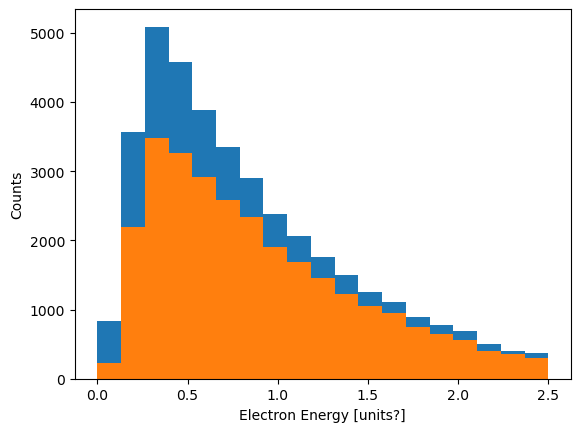

In [249]:
hist_fig, hist_ax = plt.subplots()
hist_ax.hist(energies_before, bins=bins, label='Before Cuts')
hist_ax.hist(energies_after, bins=bins, label='After Cuts')
hist_ax.set_xlabel('Electron Energy [units?]')
hist_ax.set_ylabel('Counts')

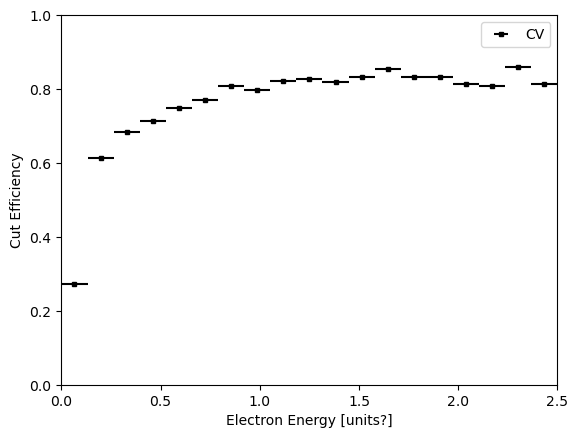

In [250]:
# counts_before = np.array(df.groupby(pd.cut(df['elec_e'], bins)).count()['elec_e'])
# counts_after = np.array(df_cut.groupby(pd.cut(df_cut['elec_e'], bins)).count()['elec_e'])

cut_efficiency = counts_after/counts_before

cut_fig, cut_ax = plt.subplots()
cut_ax.errorbar(bin_centers, cut_efficiency,xerr=bin_width/2, ls='none',marker='s',markersize=3,label='CV', color='k')

cut_ax.set_xlim(min(bins),max(bins))
cut_ax.set_ylim(0,1)
cut_ax.set_xlabel('Electron Energy [units?]')
cut_ax.set_ylabel('Cut Efficiency')
cut_ax.legend()

# Repeat for all of the Detector Variations

In [415]:
# Set the files to grab nue data

directory = 'DetVar/v01/'

file_names = ['prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root',
#               'prodgenie_bnb_intrinsic_nue_overlay_detvar_sce_reco2_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleXZ_v08_00_00_42_run1_reco2_reco2.root',
#               'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_42_run1_reco2_reco2.root'
#               'dontuse_____prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root'
             ]

variation_titles = ['CV', 
#                     'sce', 
                    'wiremode_ScaledEdX', 
                    'wiremod_ScaleX', 
                    'wiremod_ScaleYZ', 
                    'WireModAngleXZ', 
#                     'WireModAngleYZ'
#                     'wiremod_ScaleX (10%)'
                   ]

mode = 'Nue'

In [414]:
# Set the files to grab pi0 data (cuts are different so dont use)

directory = 'DetVar/v00/'

file_names = ['prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3a_reco2_reco2.root',
#               'prodgenie_nc_pi0_overlay_DetVar_SCE_reco2_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_39_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3a_reco2_reco2.root',
              'prodgenie_nc_pi0_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3a_reco2_reco2.root'
             ]

variation_titles = ['CV', 
#                     'sce', 
                    'wiremode_ScaledEdX', 
                    'wiremod_ScaleX', 
#                     'wiremod_ScaleYZ', 
                    'WireModAngleXZ', 
                    'WireModAngleYZ'
                   ]

mode='Pi0'

In [416]:
# Get all of the DataFrames
df_list = []

for file in file_names:
    
    file_name = f'{directory}{file}'
    
    try:
        
        t_temp = uproot.open(file_name)['nuselection']['NeutrinoSelectionFilter']
        
    except Exception as e:
        print(f'Couldn\'t find nuselection or NeutrinoSelectionFilter in:\n {file_name}')
        print(str(e))
        break
        t_temp = uproot.open(file_name)
        
    df_temp = t_temp.arrays(variables, library="pd")
    
    # trksemlbl
    trk_id_o = t_temp.arrays(["trk_id"], library="np")["trk_id"] - 1 #2k sample
    pfng2semlabel = t_temp.arrays(["pfng2semlabel"])["pfng2semlabel"]
    trk_pfng2semlabel_sel = get_elm_from_vec_idx(pfng2semlabel, trk_id_o)
    df_temp["trksemlbl"] = trk_pfng2semlabel_sel

    # trkpid
    trk_llr_pid_v = t_temp.arrays(["trk_llr_pid_score_v"])["trk_llr_pid_score_v"]
    trk_id = t_temp.arrays(["trk_id"], library="np")["trk_id"] - 1
    trk_llr_pid_v_sel = get_elm_from_vec_idx(trk_llr_pid_v, trk_id)
    df_temp["trkpid"] = trk_llr_pid_v_sel

    df_list.append(df_temp)

In [421]:
# Perform the cuts (and filter out events that are in both CV and the current DetVar)

is_shared = False

cv_events = np.array(df_list[0]["evt"]) # Assume CV is the first in the list

cut_efficiency_list = []
num_total_events = []
num_shared_events = []
bin_counts_before = []

for i in range(len(df_list)):
    
    df_before = df_list[i]
    df_before = df_before[df_before['truthFiducial'] == True] 
    df_before = df_before[df_before['npi0'] == 0]
    
    num_total_events.append(len(np.unique(np.array(df_before['evt']))))
    
    if is_shared: df_before = df_before[df_before['evt'].isin(cv_events)]
    
    num_shared_events.append(len(np.unique(np.array(df_before['evt']))))
    
    df_after = df_before
    
    df_after = df_after[df_after['nslice'] == 1] 
    df_after = df_after[df_after['selected'] == 1]
    df_after = df_after[df_after['shr_energy_tot_cali'] > 0.07]
    df_after = df_after[(df_after['_opfilter_pe_beam'] > 0) & (df_after['_opfilter_pe_veto'] < 20)]
    
    energies_before = np.array(df_before['elec_e'])
    energies_after = np.array(df_after['elec_e'])

    counts_before, _ = np.histogram(energies_before, bins)
    counts_after, _ = np.histogram(energies_after, bins)
    
    cut_efficiency_list.append(counts_after/counts_before)
    bin_counts_before.append(counts_before)
    
print(num_total_events)
print(num_shared_events)

[19959, 18989, 19299, 19071, 19270]
[19959, 18989, 19299, 19071, 19270]


Text(0.5, 1.0, 'Nue Cut Efficiency with Detector Variation')

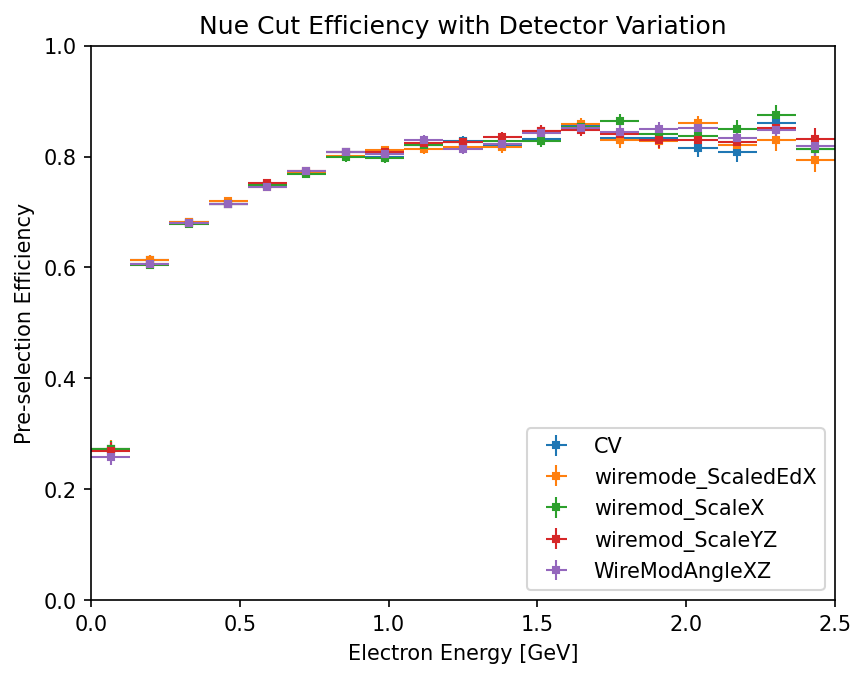

In [423]:
# Plot

cut_efficiency_fig, cut_efficiency_ax = plt.subplots(dpi=150)

for i in range(len(cut_efficiency_list)):
    
    cut_efficiency = cut_efficiency_list[i]

    proportion_error = np.sqrt(cut_efficiency*(1-cut_efficiency)/bin_counts_before[i])
    
    cut_efficiency_ax.errorbar(bin_centers, cut_efficiency,xerr=bin_width/2, yerr=proportion_error, 
                               ls='none',marker='s',ms=2.5,lw=1,
                               label=f'{variation_titles[i]}')
#                                 label=f'{variation_titles[i]} ({num_shared_events[i]} events)')
    
cut_efficiency_ax.set_xlim(min(bins),max(bins))
cut_efficiency_ax.set_ylim(0,1)
cut_efficiency_ax.set_xlabel('Electron Energy [GeV]')
cut_efficiency_ax.set_ylabel('Pre-selection Efficiency')
cut_efficiency_ax.legend(loc='lower right')
cut_efficiency_ax.set_title(f"{mode} Cut Efficiency with Detector Variation ({'Shared' if is_shared else 'All'} Events)")
cut_efficiency_ax.set_title(f"{mode} Cut Efficiency with Detector Variation")